### Phys 453: Quantum Mechanics - Coherent States of the Simple Harmonic Oscillator

Now that you know how to contruct the stationary states of the Simple Haronic Oscillator, we're going to explore how these states evolve in time.  We'll begin by looking at how arbitrary superpositions evolve, but then we'll move on to the concept of **coherent states**.  

As described in Problem 3.35 in Griffiths, a coherent state, $|\alpha>$, is a special superposition of the energy eigenfunctions of the SHO that minimizes the uncertainty principle.  They are defined as *eigenfunctions of the lowering operator*.
$$a_-|\alpha>=\alpha |\alpha>$$
Where $\alpha$ can be any complex number.  

Any arbitrary state of the SHO, $|\psi>$, can be expressed as a superposition of the energy eigenstates, $|n>$.
$$ |\psi> = \sum_{n=0}^\infty c_n |n>$$

From Problem 3.35 in Griffiths, we know that a coherent state, $|\alpha>$, is simply a superposition state with very particular values of $c_n$.
$$|\alpha>=\sum_{n=0}^\infty c_n^{coherent}|n>$$
$$c_n^{coherent} = \frac{\alpha^n}{\sqrt{n!}}c_0^{coherent}$$
$$c_0^{coherent} = exp(-|\alpha|^2/2)$$

What's not so obvious from the math is the most interesting property of coherent states: they are the quantum states that most closely resemble classical particles.  Visualizing and comparing the time evolution of coherent states with arbitrary states will make this distinction readily apparent.  This property makes coherent states a useful tool in many different areas of physics, like quantum optics and condensed matter field theory.



#### SHO Energy Eigenstates Recap
The wavefunctions and energies for the SHO energy eigenstates are
$$\psi_n(x) = \frac{1}{\sqrt{2^nn!}}\left( \frac{m\omega}{\pi \hbar} \right)^{1/4}e^{-\frac{m\omega x^2}{2\hbar}}H_n\left(\sqrt{ \frac{m \omega}{\hbar}}x \right)$$
$$E_n=\hbar \omega \left( n+\frac{1}{2}\right) $$
The full time dependent eigenstates are
$$\psi_n(x,t)=\psi_n(x)exp(-iE_nt/\hbar)$$

#### Setup
As always, we'll import the needed libraries first and set up a spacial grid to work on.  I'll also provide the functions to calculate the time-independent stationary states, $\psi_n(x)$, since you did this in a previous notebook.

Norm =  1.0


<IPython.core.display.Javascript object>


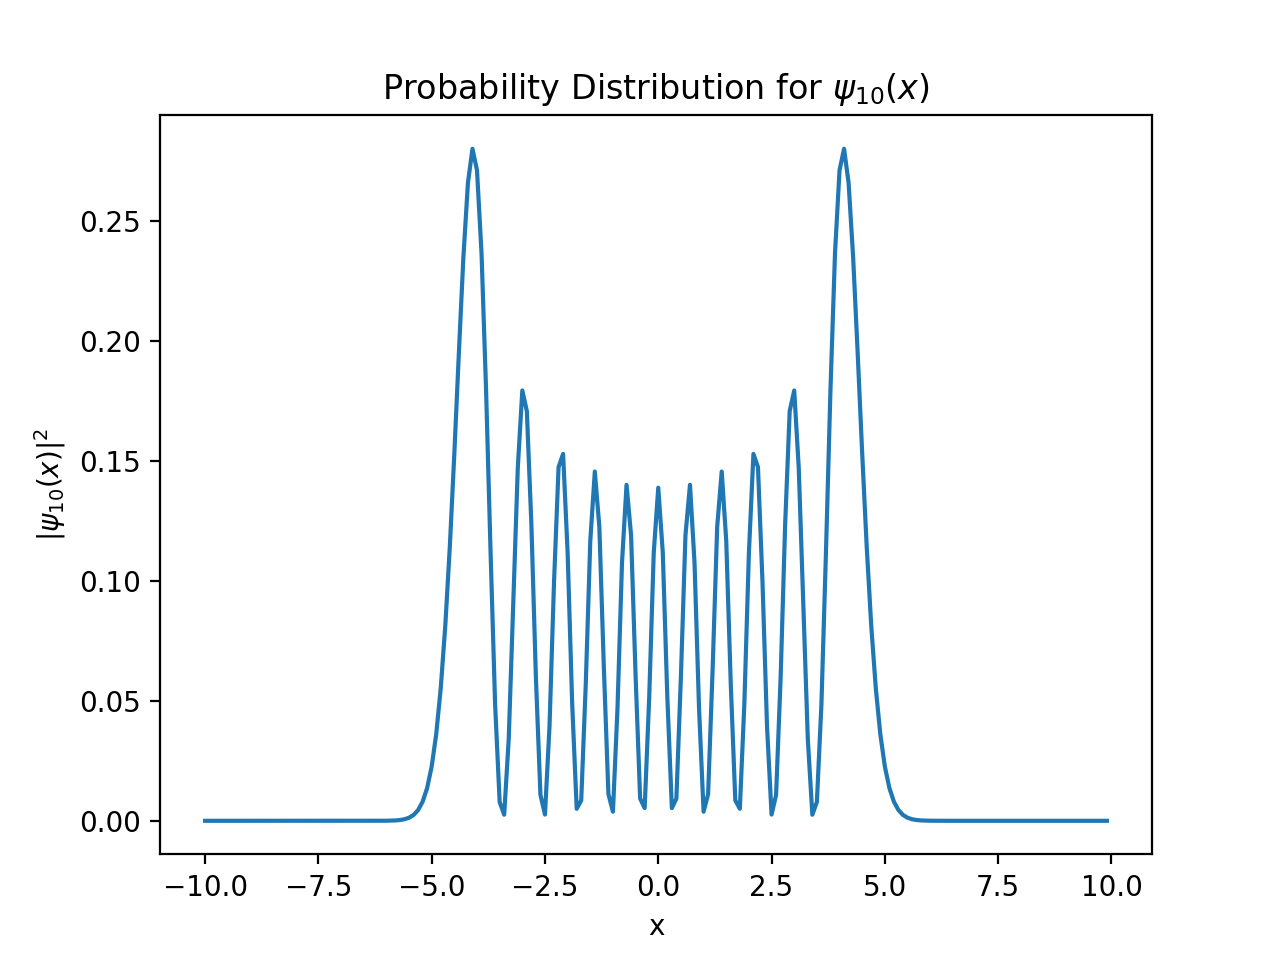

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

m=1
w=1
hbar=1

dx = 0.1
x_max = 10
x = numpy.arange(-x_max,x_max,dx)

def norm(dx, f):
    return numpy.dot(numpy.conjugate(f), f)*dx

def energy_n(n):
    return hbar*w*(n+0.5)

def psi_n_x(n, x):
    herm_arg = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n] = 1
    prefactor = 1./numpy.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor * numpy.exp(- herm_arg**2 / 2) * Herm.hermval(herm_arg, herm_coeffs)
    return psi

n=10
psi = psi_n_x(n,x)
prob = numpy.conjugate(psi)*psi
print("Norm = ", dx*numpy.sum(prob))
plt.plot(x, prob)
plt.title(r'Probability Distribution for $\psi_{10}(x)$')
plt.xlabel('x')
plt.ylabel(r'$|\psi_{10}(x)|^2$')
plt.show()

#### Question 1
Complete the function `psi_n_x_t(n,x,t)` so that it returns an array with the values of $\psi_n(x,t)$.  Remember that you already have a function that gives you $\psi_n(x)$ up above!

In [6]:
def psi_n_x_t(n, x, t):
    return psi_n_x(n, x)*numpy.exp(-1j * energy_n(n) * t / hbar)

#### Question 2
Now complete the function `wavefunction(cn,x,t)` so that it returns the superposition state for the given coefficients, $c_n$.

In [7]:
def wavefunction(cn, x, t):
    
    # First we check that the coefficients obey the rule that total probability = 1
    total_probability = numpy.dot(numpy.conjugate(cn),cn)
    if(not abs(total_probability - 1) < 1e-6):    
        print("Error! Sum of the conefficients squared does not equal 1! Total Probability =", total_probability)
        return
    
    # Now we create a blank wavefunction.  We will add each eigenstate to it, weighted by the proper coefficients.
    wf = numpy.zeros_like(x)
    for n in range(0,len(cn)):
        wf = wf + cn[n]*psi_n_x_t(n, x, t)   # This is the line you need to fix!
        
    return wf

#### Question 3
The below cell defines coefficients, $c_n$, corresponding to a single stationary state in the array `cn_arbitary`.  The cell after it uses the standard animation code to show the time evolution of the state.  Change the `cn_arbitary` array to define some arbitary superposition state and watch its time evolution too.  Below, describe how well you think either state represents a classical particle.  What are some properties you think define how a classical particle "should" behave?

In [8]:
cn_arbitrary = numpy.array([0,1,0,0,0,0])

#Normalize the coefficients
cn_arbitrary = cn_arbitrary / numpy.sqrt(numpy.dot(numpy.conjugate(cn_arbitrary), cn_arbitrary))

<IPython.core.display.Javascript object>


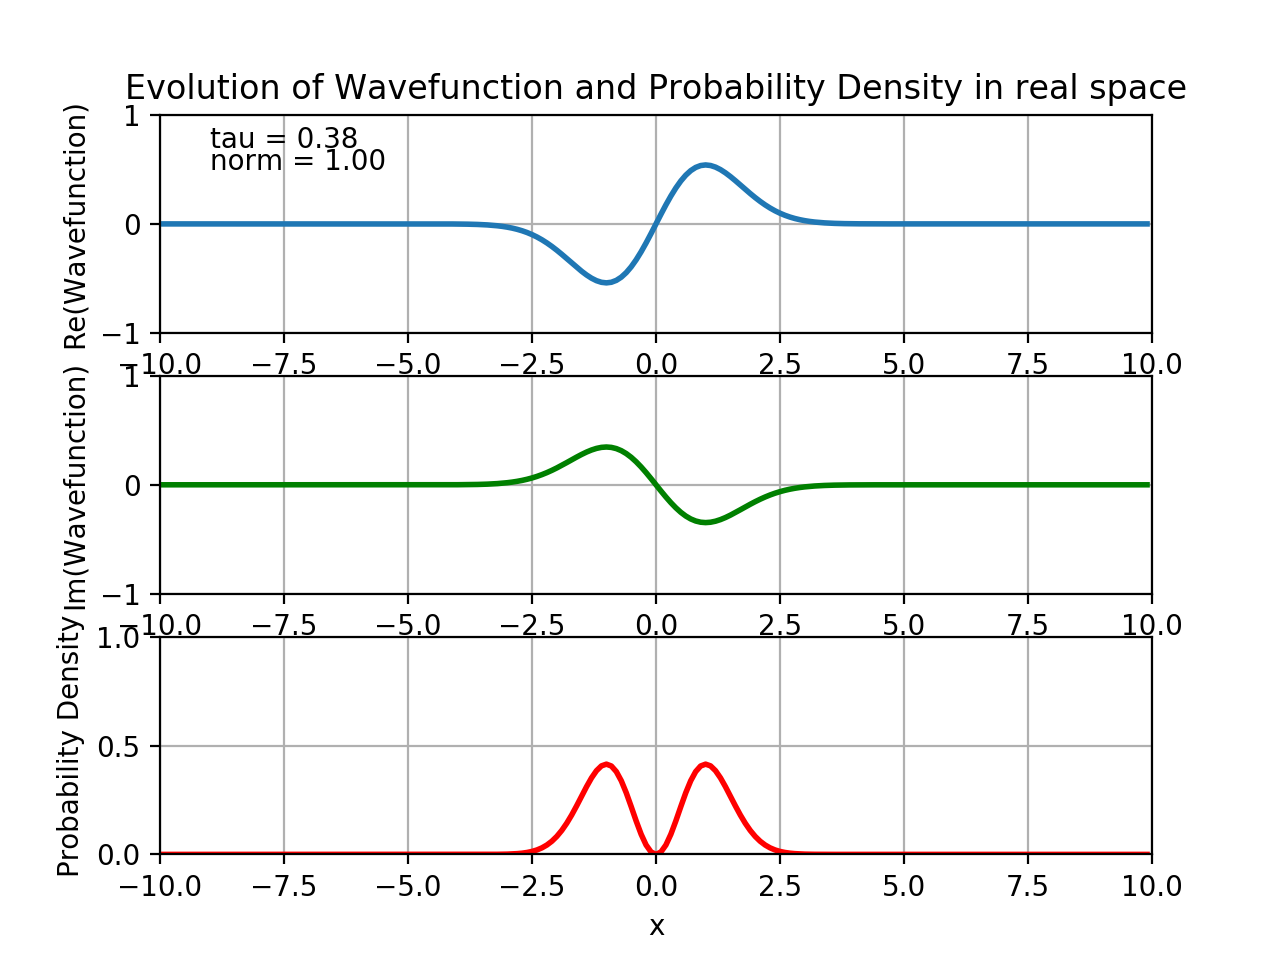

In [9]:
import matplotlib.animation as animation
  
# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='g')
line3, = ax3.plot([], [], lw=2, color='r')
line = [line1, line2, line3]

# the same axes initalizations as before (just now we do it for both of them)
ax1.set_ylim(-1,1)
ax1.set_xlim(-x_max, x_max)
ax1.grid()
ax1.set_ylabel("Re(Wavefunction)")
ax1.set_title("Evolution of Wavefunction and Probability Density in real space")

ax2.set_ylim(-1, 1)
ax2.set_xlim(-x_max, x_max)
ax2.grid()
ax2.set_ylabel("Im(Wavefunction)")

ax3.set_ylim(0, 1)
ax3.set_xlim(-x_max, x_max)
ax3.grid()
ax3.set_xlabel("x")
ax3.set_ylabel("Probability Density")

time_text = ax1.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
norm_text = ax1.text(0.05, 0.85,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
time_per_frame = 0.01     # You could change this to make the animation faster or slower

def run_init():
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    return line,
    
def run(i):
    wf = wavefunction(cn_arbitrary, x, time_per_frame*i)
    y1data = numpy.real(wf)
    y2data = numpy.imag(wf)
    y3data = numpy.conjugate(wf)*wf

    # update the data of the three line objects
    line[0].set_data(x, y1data)
    line[1].set_data(x, y2data)
    line[2].set_data(x, y3data)
    #Display the current animation time
    time_text.set_text('tau = %.2f' % (i*time_per_frame))
    norm_text.set_text('norm = %.2f' % (norm(dx,wf)))
    return line, time_text, norm_text

ani = animation.FuncAnimation(fig, run, init_func=run_init,
                               frames=1000, interval=20, blit=True)
    
plt.show()

#### Write your answer to question 3 here

Neither the eigenstates nor the general superpositions look like a classical particle, because they describe a particle that can be found in separate locations and the seems to move around sporatically.  A classical particle should be localized to a particular region, bounce back and forth in the well, and move without losing its shape. 

#### Question 4
Now let's look at how coherent states behave.  Fill in `cn_coherent` with the appropriate values of $c_n$ for a coherent state.  For the eigenvalue, use $\alpha=3$.  Note that since there are an infinite number of $c_n$ for a coherent state that are non-zero, we need to make a numerical approximation by imposing a cutoff, $n=0..n_{max}$.  The contributions of the high energy eigenstates are strongly surpressed, so $n_{max}$ shouldn't need to be too large to get a really good approximation of a true coherent state.  Start with $n_{max}=15$, and then move it up and down to see how the result changes.

The cell afterwards uses `cn_coherent` to animate the time evolution of the coherent state. (Make sure to stop the first animation before starting the second!) Below the graphs, describe the behavior of the coherent state and contrast it with the arbitrary superpositions up above.  How does changing $n_{max}$ affect things?  Why do you think people describe coherent states as the "most classical" of quantum states?

In [15]:
alpha = 3
n_max = 10
cn_coherent = numpy.zeros(n_max)
for n in range(0, n_max):
    cn_coherent[n] = alpha**n / math.sqrt(math.factorial(n))
  
#Normalize the coefficients
cn_coherent = cn_coherent / math.sqrt(numpy.dot(numpy.conjugate(cn_coherent), cn_coherent))

<IPython.core.display.Javascript object>


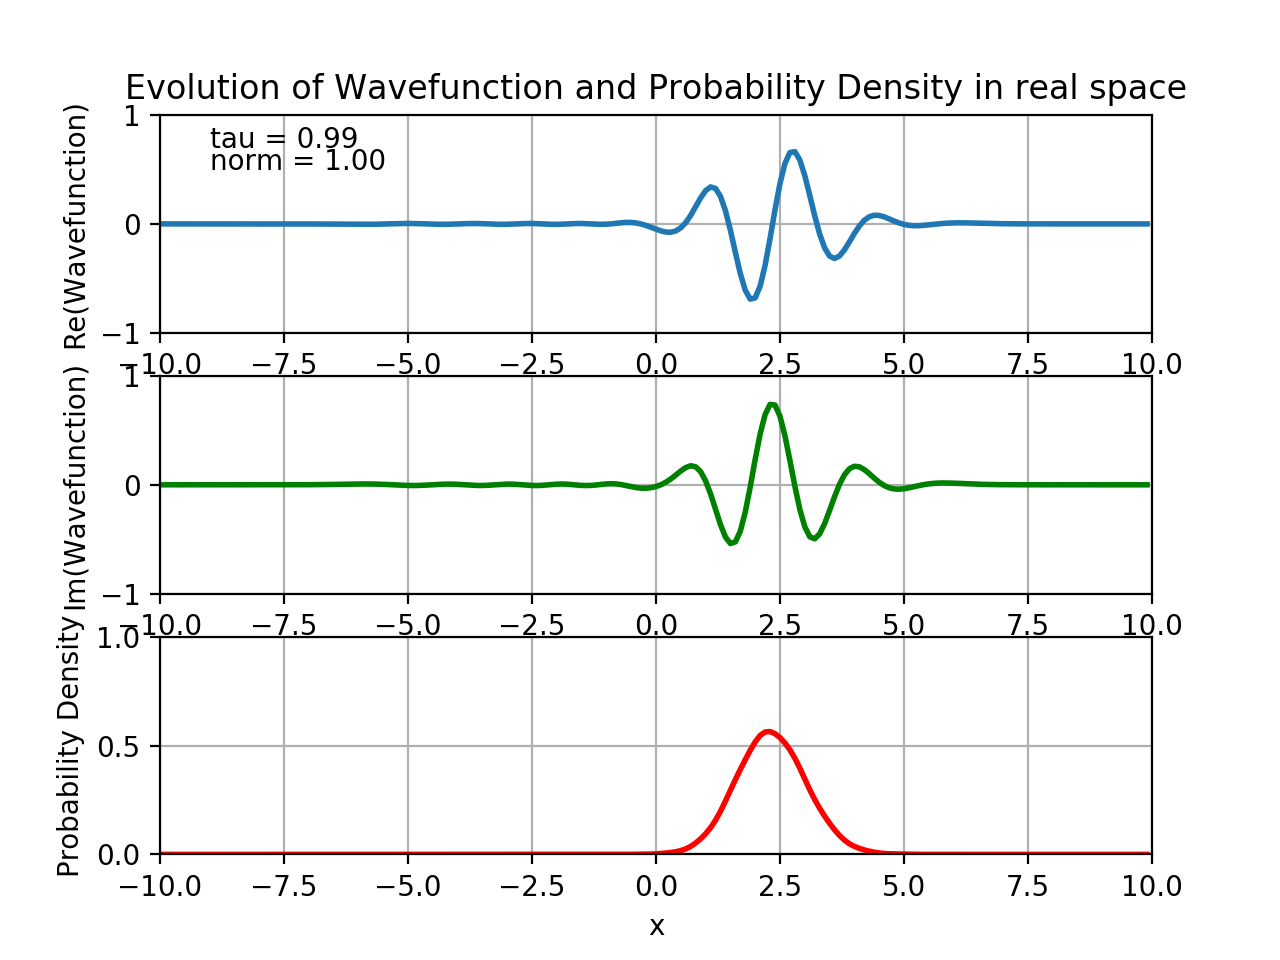

In [14]:
# create a figure with two subplots
fig1, (ax1, ax2, ax3) = plt.subplots(3,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='g')
line3, = ax3.plot([], [], lw=2, color='r')
line = [line1, line2, line3]

# the same axes initalizations as before (just now we do it for both of them)
ax1.set_ylim(-1,1)
ax1.set_xlim(-x_max, x_max)
ax1.grid()
ax1.set_ylabel("Re(Wavefunction)")
ax1.set_title("Evolution of Wavefunction and Probability Density in real space")

ax2.set_ylim(-1, 1)
ax2.set_xlim(-x_max, x_max)
ax2.grid()
ax2.set_ylabel("Im(Wavefunction)")

ax3.set_ylim(0, 1)
ax3.set_xlim(-x_max, x_max)
ax3.grid()
ax3.set_xlabel("x")
ax3.set_ylabel("Probability Density")

time_text = ax1.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
norm_text = ax1.text(0.05, 0.85,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
time_per_frame = 0.01     # You could change this to make the animation faster or slower

def run_init():
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    return line,
    
def run(i):
    wf = wavefunction(cn_coherent, x, time_per_frame*i)
    y1data = numpy.real(wf)
    y2data = numpy.imag(wf)
    y3data = numpy.conjugate(wf)*wf

    # update the data of the three line objects
    line[0].set_data(x, y1data)
    line[1].set_data(x, y2data)
    line[2].set_data(x, y3data)
    #Display the current animation time
    time_text.set_text('tau = %.2f' % (i*time_per_frame))
    norm_text.set_text('norm = %.2f' % (norm(dx,wf)))
    return line, time_text, norm_text

ani = animation.FuncAnimation(fig1, run, init_func=run_init,
                               frames=1000, interval=20, blit=True)
    
plt.show()

#### Write your answer to question 4 here
The coherent state is localized to one region and stays localized as it moves through space.  Its movement is also similar to a classical particle in that it smoothly bounces back and forth in the well.  Increasing $n_{max}$ makes the state smoother and less wiggly, and damps down the quantum oscillations in the probability distribution.  All of these characteristics give the quantum coherent states a more classical appearance that a general quantum state.